In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

### Data Set Information

##### Source:

The dataset was created by Angeliki Xifara (angxifara '@' gmail.com, Civil/Structural Engineer) and was processed by Athanasios Tsanas (tsanasthanasis '@' gmail.com, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).


##### Data Set Information:

We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.


##### Attribute Information:

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically:
- X1: Relative Compactness
- X2: Surface Area
- X3: Wall Area
- X4: Roof Area
- X5: Overall Height
- X6: Orientation
- X7: Glazing Area
- X8: Glazing Area Distribution
- y1: Heating Load
- y2: Cooling Load


##### Relevant Papers:

A. Tsanas, A. Xifara: 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools', Energy and Buildings, Vol. 49, pp. 560-567, 2012



##### Citation Request:

A. Tsanas, A. Xifara: 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools', Energy and Buildings, Vol. 49, pp. 560-567, 2012 (the paper can be accessed from [Web Link])

For further details on the data analysis methodology:
A. Tsanas, 'Accurate telemonitoring of Parkinsonâ€™s disease symptom severity using nonlinear speech signal processing and statistical machine learning', D.Phil. thesis, University of Oxford, 2012 (which can be accessed from [Web Link])

In [2]:
data = pd.read_excel('ENB2012_data.xlsx')

In [3]:
data


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [55]:
column_names = {'X1': 'Relative Compactness', 'X2': 'Surface Area', 'X3': 'Wall Area', 'X4': 'Roof Area', 'X5': 'Overall Height', 'X6': 'Orientation','X7': 'Glazing Area', 'X8': 'Glazing Area Distribution', 'Y1': 'Heating Load', 'Y2': 'Cooling Load' }
data = data.rename(columns=column_names)

In [56]:
data

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [53]:
data.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [58]:
data.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

### Exploratory Data Analysis

#### Univariate Analysis

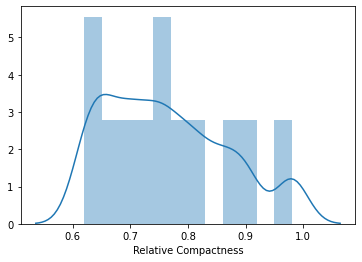

In [59]:
sns.distplot(data['Relative Compactness'])

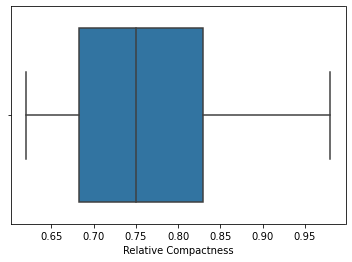

In [60]:
sns.boxplot(data['Relative Compactness'])

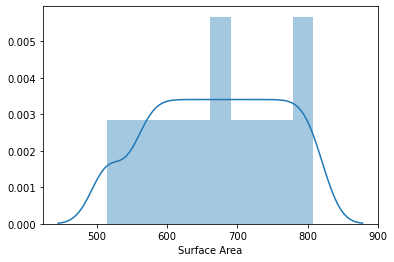

In [61]:
sns.distplot(data['Surface Area'])

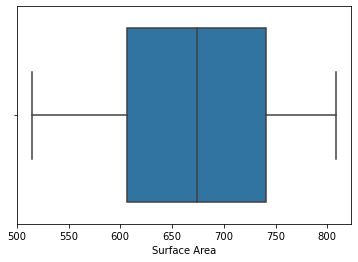

In [62]:
sns.boxplot(data['Surface Area'])

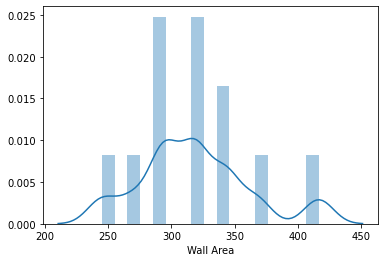

In [63]:
sns.distplot(data['Wall Area'])

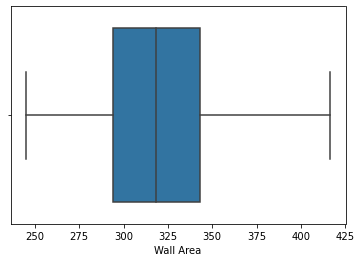

In [64]:
sns.boxplot(data['Wall Area'])

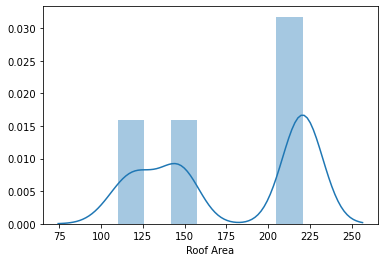

In [66]:
sns.distplot(data['Roof Area'])

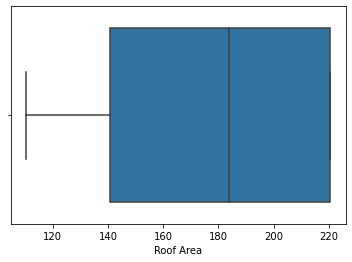

In [65]:
sns.boxplot(data['Roof Area'])

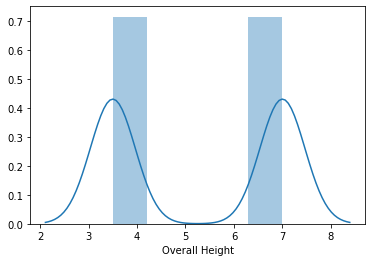

In [68]:
sns.distplot(data['Overall Height'])

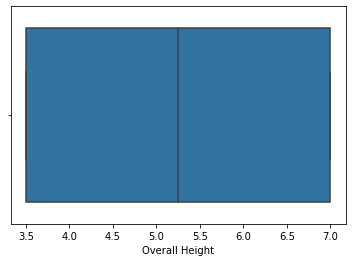

In [67]:
sns.boxplot(data['Overall Height'])

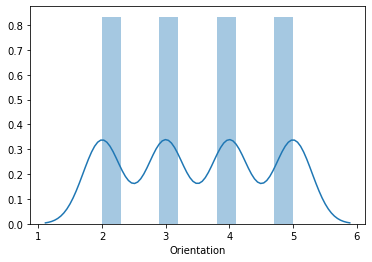

In [69]:
sns.distplot(data['Orientation'])

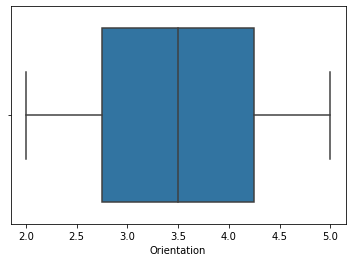

In [70]:
sns.boxplot(data['Orientation'])

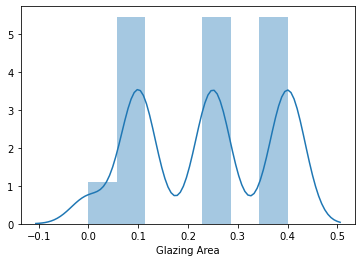

In [71]:
sns.distplot(data['Glazing Area'])

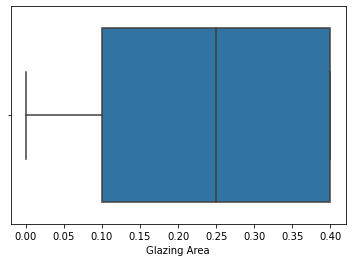

In [72]:
sns.boxplot(data['Glazing Area'])

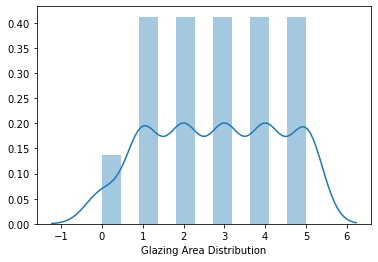

In [73]:
sns.distplot(data['Glazing Area Distribution'])

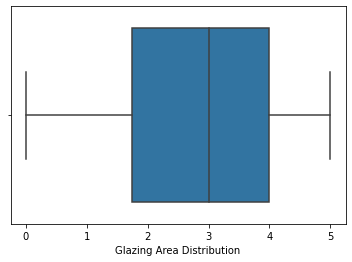

In [74]:
sns.boxplot(data['Glazing Area Distribution'])

#### Bivariate Analysis

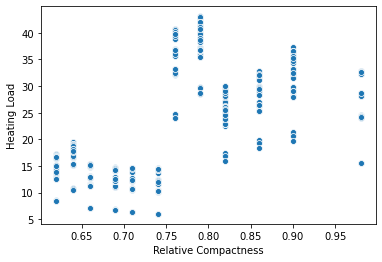

In [76]:
sns.scatterplot(x='Relative Compactness', y='Heating Load', data=data)

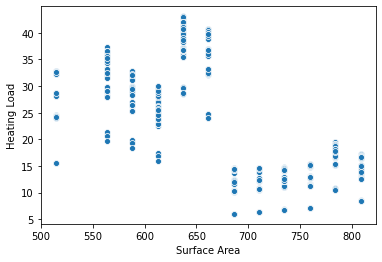

In [77]:
sns.scatterplot(x='Surface Area', y='Heating Load', data=data)

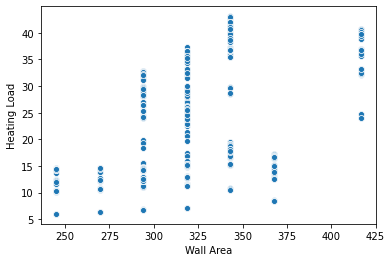

In [79]:
sns.scatterplot(x='Wall Area', y='Heating Load', data=data)

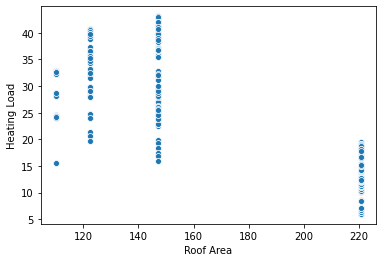

In [80]:
sns.scatterplot(x='Roof Area', y='Heating Load', data=data)

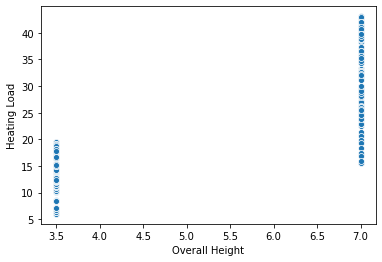

In [81]:
sns.scatterplot(x='Overall Height', y='Heating Load', data=data)

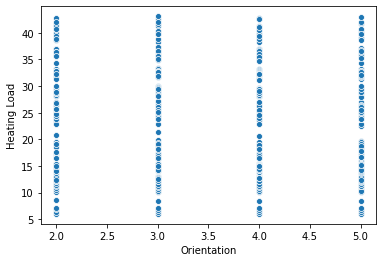

In [82]:
sns.scatterplot(x='Orientation', y='Heating Load', data=data)

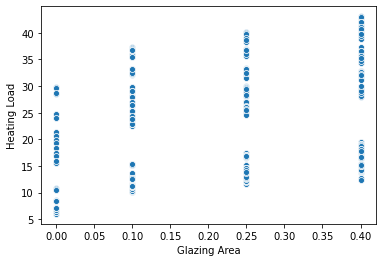

In [83]:
sns.scatterplot(x='Glazing Area', y='Heating Load', data=data)

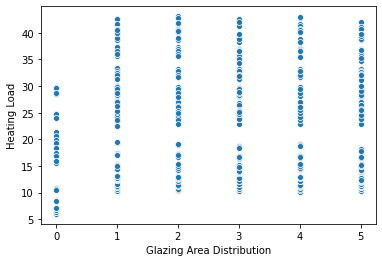

In [84]:
sns.scatterplot(x='Glazing Area Distribution', y='Heating Load', data=data)

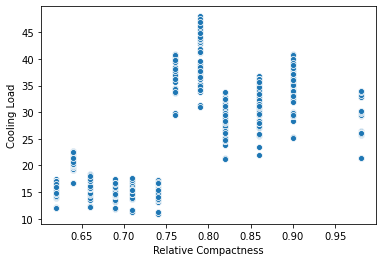

In [85]:
sns.scatterplot(x='Relative Compactness', y='Cooling Load', data=data)

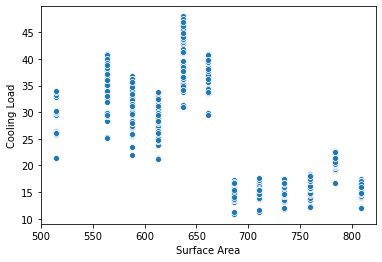

In [86]:
sns.scatterplot(x='Surface Area', y='Cooling Load', data=data)

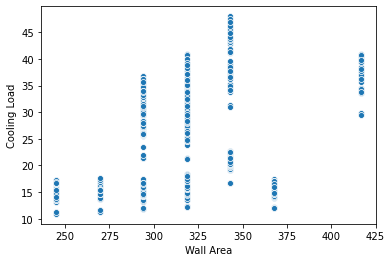

In [87]:
sns.scatterplot(x='Wall Area', y='Cooling Load', data=data)

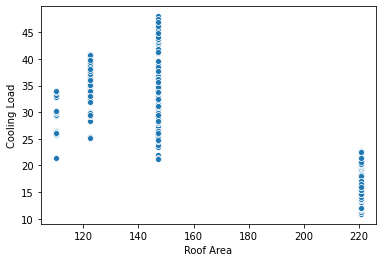

In [88]:
sns.scatterplot(x='Roof Area', y='Cooling Load', data=data)

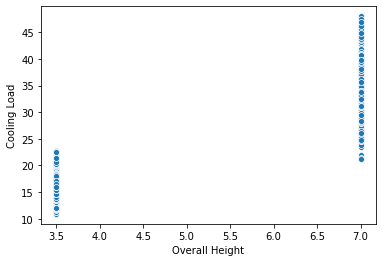

In [91]:
sns.scatterplot(x='Overall Height', y='Cooling Load', data=data)

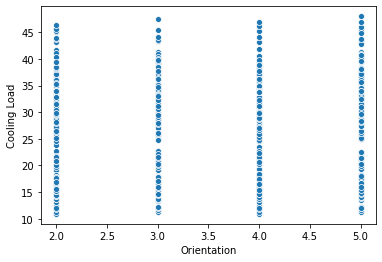

In [92]:
sns.scatterplot(x='Orientation', y='Cooling Load', data=data)

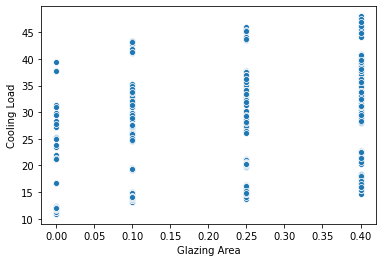

In [93]:
sns.scatterplot(x='Glazing Area', y='Cooling Load', data=data)

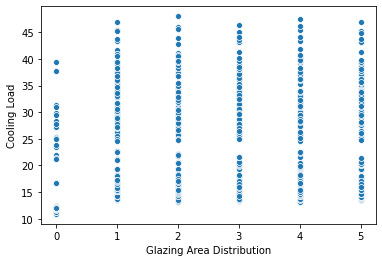

In [94]:
sns.scatterplot(x='Glazing Area Distribution', y='Cooling Load', data=data)

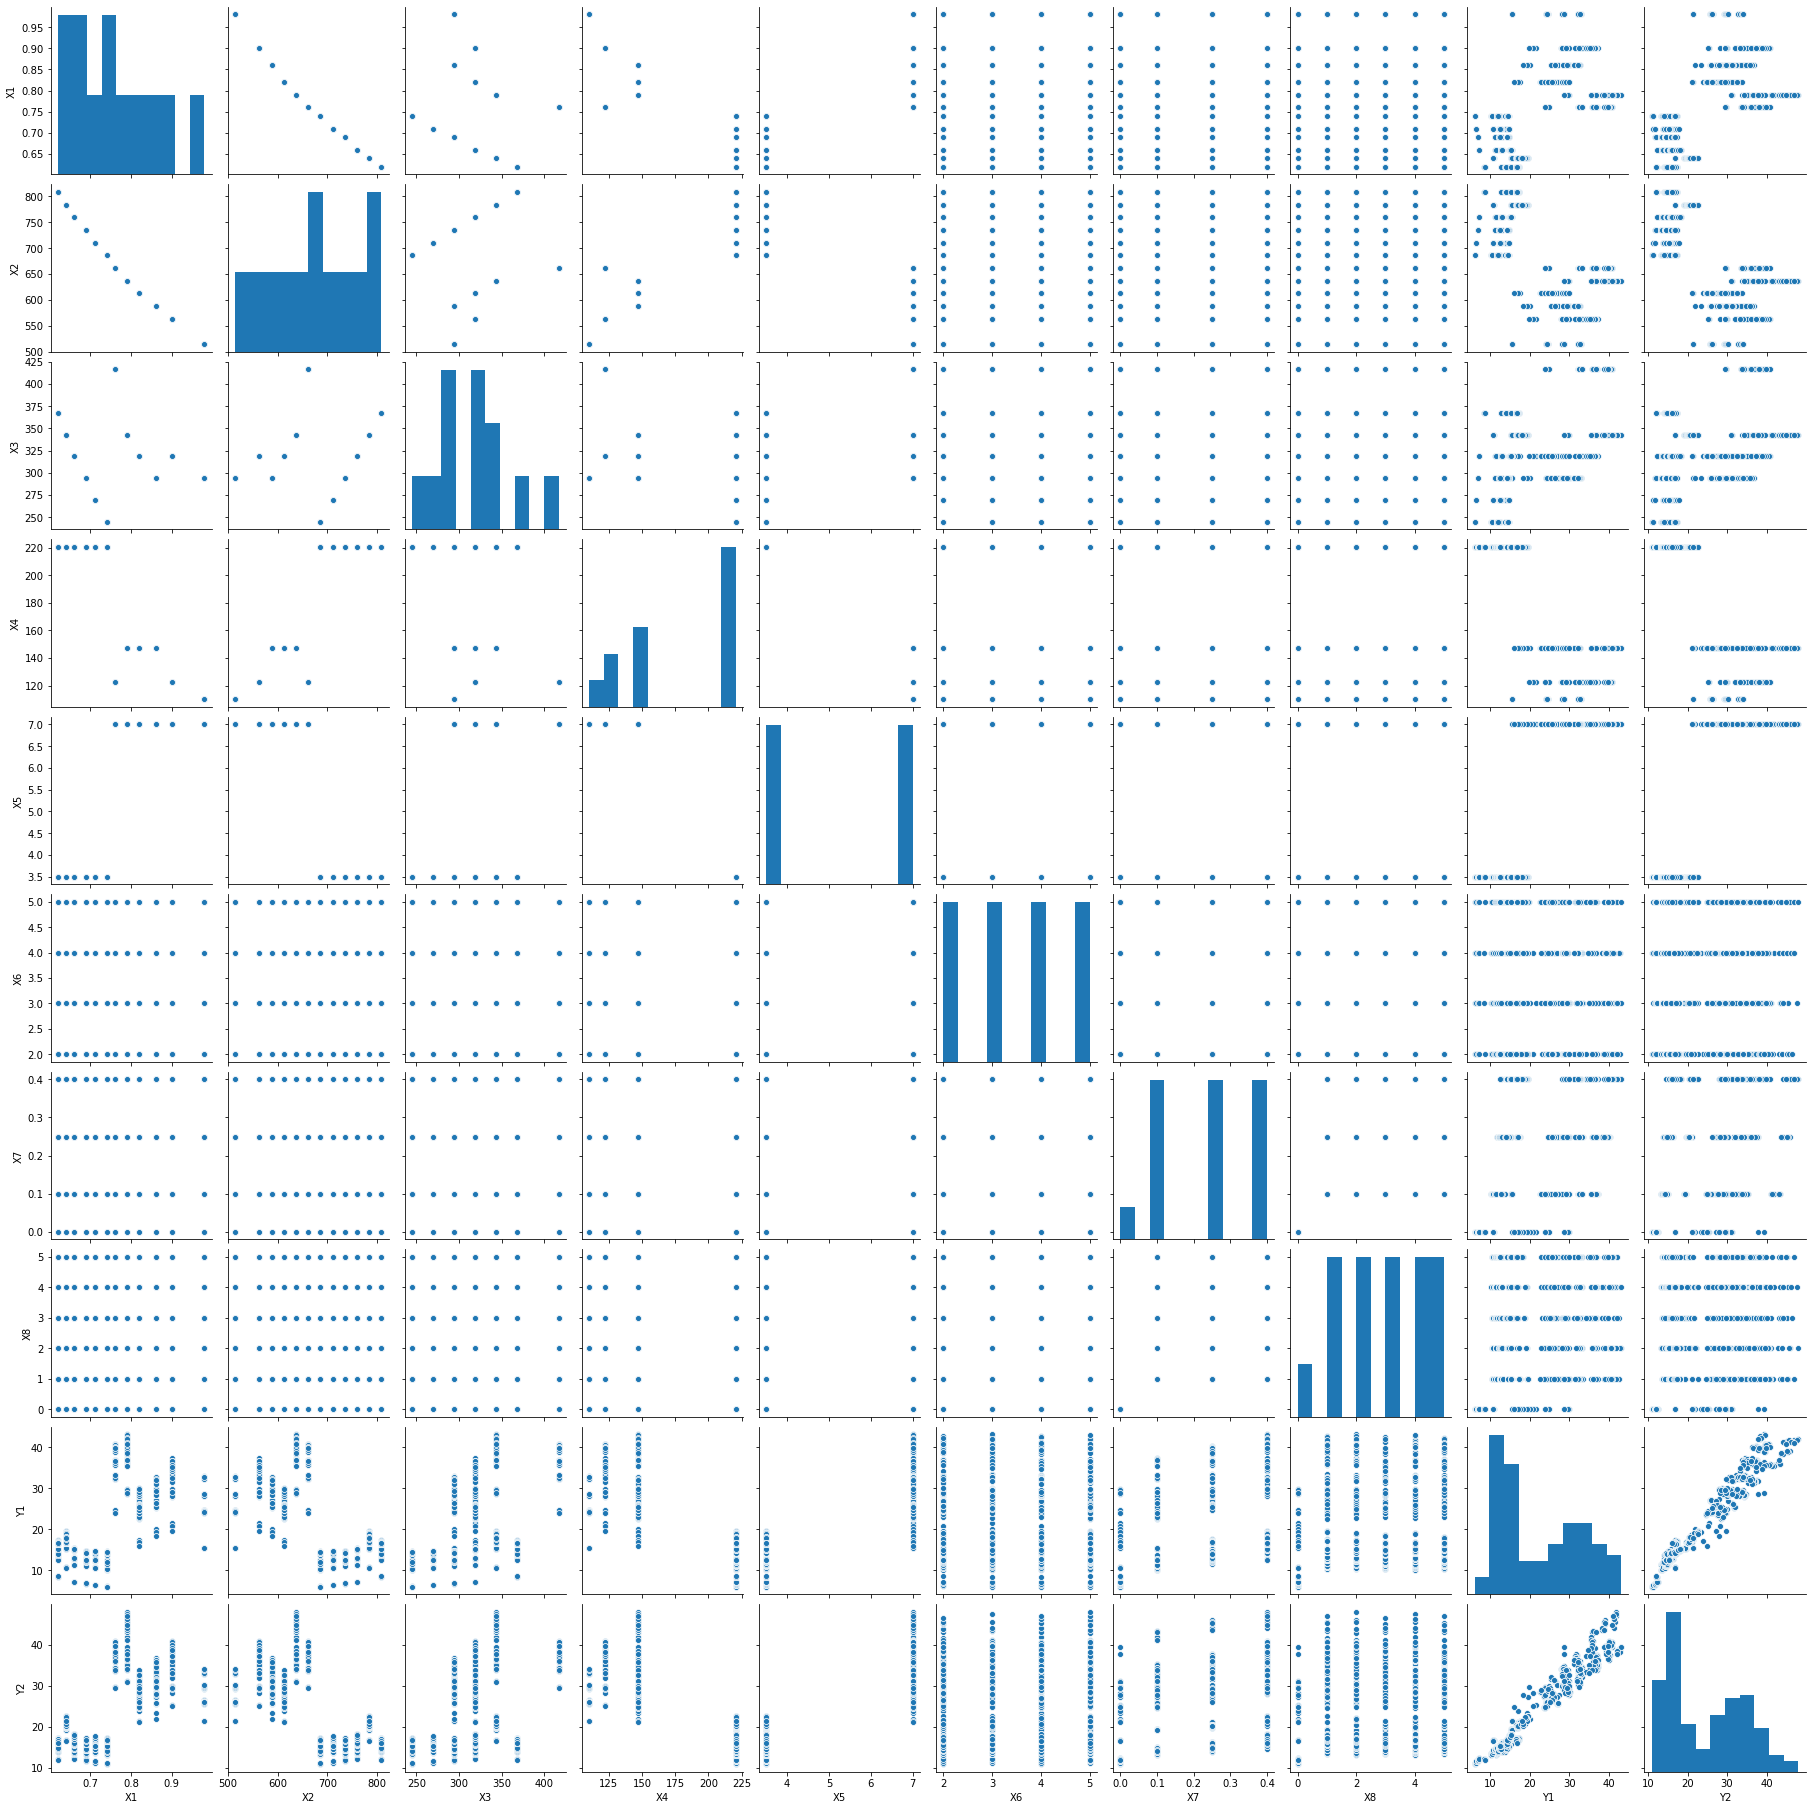

In [40]:
sns.pairplot(data)

In [96]:
corr = data.corr()

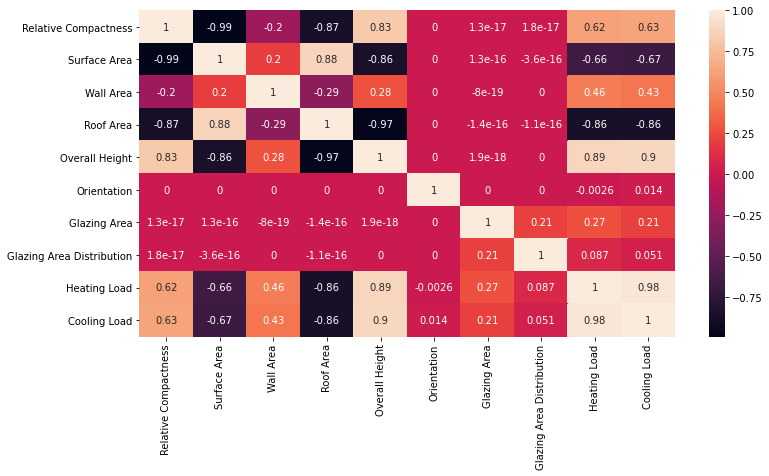

In [97]:
plt.figure(figsize= (12,6))
sns.heatmap(corr, annot=True)

### Model Building

In [112]:
data

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


#### Feature Scaling

In [130]:
#Feature Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)
col = data.columns
normalized_data = pd.DataFrame(normalized_data, columns=col)


In [122]:
normalized_data.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.400463,0.534722,0.428571,0.601852,0.500000,0.500000,0.585938,0.562500,0.439396,0.368644
std,0.293826,0.299613,0.254382,0.409668,0.500326,0.372921,0.333051,0.310192,0.272046,0.256216
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173611,0.312500,0.285714,0.277778,0.000000,0.250000,0.250000,0.350000,0.188258,0.127121
50%,0.361111,0.541667,0.428571,0.666667,0.500000,0.500000,0.625000,0.600000,0.348881,0.301104
75%,0.583333,0.770833,0.571429,1.000000,1.000000,0.750000,1.000000,0.800000,0.691763,0.598775
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standard_data = scaler.fit_transform(data)
standard_data = pd.DataFrame(standard_data, columns=col)


In [129]:
standard_data.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,7.680000e+02,7.680000e+02,768.000000,7.680000e+02,768.000000,768.000000,7.680000e+02,768.000000,7.680000e+02,7.680000e+02
mean,-7.401487e-17,-4.163336e-16,0.000000,2.174187e-16,0.000000,0.000000,1.480297e-16,0.000000,7.401487e-17,-2.035409e-16
std,1.000652e+00,1.000652e+00,1.000652,1.000652e+00,1.000652,1.000652,1.000652e+00,1.000652,1.000652e+00,1.000652e+00
min,-1.363812e+00,-1.785875e+00,-1.685854,-1.470077e+00,-1.000000,-1.341641,-1.760447e+00,-1.814575,-1.616203e+00,-1.439739e+00
25%,-7.725642e-01,-7.421818e-01,-0.561951,-7.915797e-01,-1.000000,-0.670820,-1.009323e+00,-0.685506,-9.237440e-01,-9.432688e-01
50%,-1.340162e-01,2.319318e-02,0.000000,1.583159e-01,0.000000,0.000000,1.173631e-01,0.120972,-3.329351e-01,-2.637774e-01
75%,6.227813e-01,7.885681e-01,0.561951,9.725122e-01,1.000000,0.670820,1.244049e+00,0.766154,9.282671e-01,8.987736e-01
max,2.041777e+00,1.553943e+00,2.247806,9.725122e-01,1.000000,1.341641,1.244049e+00,1.411336,2.062035e+00,2.465759e+00


- Linear Regression
- Polynomial Regression
- Ridge Regression
- Lasso Regression
- Elastic Net Regression

In [147]:
X = standard_data.iloc[:,:-2].copy()
y = standard_data['Heating Load'].copy()

In [228]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
def regression_model(X_train, y_train, X_test, y_test, degree):
    
    #linear_regression
    from sklearn.linear_model import LinearRegression
    linear = LinearRegression()
    linear.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    #polynomial regression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.pipeline import make_pipeline
    from sklearn.linear_model import LinearRegression
    degree=degree
    polyreg = make_pipeline(PolynomialFeatures(degree),LinearRegression())
    polyreg.fit(X_train,y_train)
    y_poly_pred = polyreg.predict(X_test)
    
    #ridge regression
    from sklearn.linear_model import Ridge
    from sklearn.preprocessing import PolynomialFeatures
    
    poly = PolynomialFeatures(degree=degree)
    X__train = poly.fit_transform(X_train)
    X__test = poly.fit_transform(X_test)
    ridge = Ridge(alpha=0.01)
    ridge.fit(X__train, y_train) 
    y_ridge_pred = ridge.predict(X__test)
    
    #lasso regression
    from sklearn.linear_model import Lasso
    model_lasso = Lasso(alpha=0.01)

    poly = PolynomialFeatures(degree=degree)
    X__train = poly.fit_transform(X_train)
    X__test = poly.fit_transform(X_test)
    model_lasso.fit(X__train, y_train) 
    y_lasso_pred = model_lasso.predict(X__test)
    
    
    #elastic net regression
    from sklearn.linear_model import ElasticNet

    model_enet = ElasticNet(alpha = 0.01)
    poly = PolynomialFeatures(degree=degree)
    X__train = poly.fit_transform(X_train)
    X__test = poly.fit_transform(X_test)
    from sklearn.metrics import r2_score
    model_enet.fit(X__train, y_train) 
    y_enet_pred = model_enet.predict(X__test)
    
    #Regression Evaluation
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    
    print('Linear Regression: Root Mean Squared Error - ', round(np.sqrt(mean_squared_error(y_test, y_pred)),3))
    print('Linear Regression: Root Squared Error -', round(r2_score(y_test, y_pred), 3))
    print('Polynomial Regression: Root Mean Squared Error -', round(np.sqrt(mean_squared_error(y_test, y_poly_pred)),3))
    print('Polynomial Regression: Root Squared Error -', round(r2_score(y_test, y_poly_pred), 3))
    print('Ridge Regression: Root Mean Squared Error -', round(np.sqrt(mean_squared_error(y_test, y_ridge_pred)),3))
    print('Ridge Regression: Root Squared Error -', round(r2_score(y_test, y_ridge_pred), 3))
    print('Lasso Regression: Root Mean Squared Error -', round(np.sqrt(mean_squared_error(y_test, y_lasso_pred)),3))
    print('Lasso Regression: Root Squared Error -', round(r2_score(y_test, y_lasso_pred), 3))
    print('Elastic Net Regression: Root Mean Squared Error -', round(np.sqrt(mean_squared_error(y_test, y_enet_pred)),3))
    print('Elastic Net Regression: Root Squared Error -', round(r2_score(y_test, y_enet_pred), 3))


In [233]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regression_model(X_train, y_train, X_test, y_test, 3)

Linear Regression: Root Mean Squared Error -  0.303
Linear Regression: Root Squared Error - 0.911
Polynomial Regression: Root Mean Squared Error - 0.055
Polynomial Regression: Root Squared Error - 0.997
Ridge Regression: Root Mean Squared Error - 0.055
Ridge Regression: Root Squared Error - 0.997
Lasso Regression: Root Mean Squared Error - 0.221
Lasso Regression: Root Squared Error - 0.953
Elastic Net Regression: Root Mean Squared Error - 0.212
Elastic Net Regression: Root Squared Error - 0.957


In [234]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
for i in range(1, 10):
    regression_model(X_train, y_train, X_test, y_test, i)
    print()
    print()
    

Linear Regression: Root Mean Squared Error -  0.303
Linear Regression: Root Squared Error - 0.911
Polynomial Regression: Root Mean Squared Error - 0.302
Polynomial Regression: Root Squared Error - 0.912
Ridge Regression: Root Mean Squared Error - 0.302
Ridge Regression: Root Squared Error - 0.912
Lasso Regression: Root Mean Squared Error - 0.318
Lasso Regression: Root Squared Error - 0.902
Elastic Net Regression: Root Mean Squared Error - 0.318
Elastic Net Regression: Root Squared Error - 0.902


Linear Regression: Root Mean Squared Error -  0.303
Linear Regression: Root Squared Error - 0.911
Polynomial Regression: Root Mean Squared Error - 0.112
Polynomial Regression: Root Squared Error - 0.988
Ridge Regression: Root Mean Squared Error - 0.105
Ridge Regression: Root Squared Error - 0.989
Lasso Regression: Root Mean Squared Error - 0.272
Lasso Regression: Root Squared Error - 0.929
Elastic Net Regression: Root Mean Squared Error - 0.267
Elastic Net Regression: Root Squared Error - 0.93

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3077733729780654, tolerance: 0.05290812346880514
  model = cd_fast.enet_coordinate_descent(
c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4467912246288126, tolerance: 0.05290812346880514
  model = cd_fast.enet_coordinate_descent(


Linear Regression: Root Mean Squared Error -  0.303
Linear Regression: Root Squared Error - 0.911
Polynomial Regression: Root Mean Squared Error - 0.056
Polynomial Regression: Root Squared Error - 0.997
Ridge Regression: Root Mean Squared Error - 0.054
Ridge Regression: Root Squared Error - 0.997
Lasso Regression: Root Mean Squared Error - 0.212
Lasso Regression: Root Squared Error - 0.957
Elastic Net Regression: Root Mean Squared Error - 0.147
Elastic Net Regression: Root Squared Error - 0.979




c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0903767703231253, tolerance: 0.05290812346880514
  model = cd_fast.enet_coordinate_descent(
c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8850945405757873, tolerance: 0.05290812346880514
  model = cd_fast.enet_coordinate_descent(


Linear Regression: Root Mean Squared Error -  0.303
Linear Regression: Root Squared Error - 0.911
Polynomial Regression: Root Mean Squared Error - 0.062
Polynomial Regression: Root Squared Error - 0.996
Ridge Regression: Root Mean Squared Error - 0.058
Ridge Regression: Root Squared Error - 0.997
Lasso Regression: Root Mean Squared Error - 0.195
Lasso Regression: Root Squared Error - 0.963
Elastic Net Regression: Root Mean Squared Error - 0.128
Elastic Net Regression: Root Squared Error - 0.984




c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.488777231932893, tolerance: 0.05290812346880514
  model = cd_fast.enet_coordinate_descent(
c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.854001975525248, tolerance: 0.05290812346880514
  model = cd_fast.enet_coordinate_descent(


Linear Regression: Root Mean Squared Error -  0.303
Linear Regression: Root Squared Error - 0.911
Polynomial Regression: Root Mean Squared Error - 0.156
Polynomial Regression: Root Squared Error - 0.976
Ridge Regression: Root Mean Squared Error - 0.109
Ridge Regression: Root Squared Error - 0.988
Lasso Regression: Root Mean Squared Error - 0.175
Lasso Regression: Root Squared Error - 0.97
Elastic Net Regression: Root Mean Squared Error - 0.116
Elastic Net Regression: Root Squared Error - 0.987




c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.302766430237185, tolerance: 0.05290812346880514
  model = cd_fast.enet_coordinate_descent(
c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.015655194662383, tolerance: 0.05290812346880514
  model = cd_fast.enet_coordinate_descent(


Linear Regression: Root Mean Squared Error -  0.303
Linear Regression: Root Squared Error - 0.911
Polynomial Regression: Root Mean Squared Error - 2.929
Polynomial Regression: Root Squared Error - -7.296
Ridge Regression: Root Mean Squared Error - 0.395
Ridge Regression: Root Squared Error - 0.849
Lasso Regression: Root Mean Squared Error - 0.169
Lasso Regression: Root Squared Error - 0.972
Elastic Net Regression: Root Mean Squared Error - 0.114
Elastic Net Regression: Root Squared Error - 0.987




c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.848690496911338, tolerance: 0.05290812346880514
  model = cd_fast.enet_coordinate_descent(
c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.995842860064425, tolerance: 0.05290812346880514
  model = cd_fast.enet_coordinate_descent(


Linear Regression: Root Mean Squared Error -  0.303
Linear Regression: Root Squared Error - 0.911
Polynomial Regression: Root Mean Squared Error - 0.934
Polynomial Regression: Root Squared Error - 0.157
Ridge Regression: Root Mean Squared Error - 0.841
Ridge Regression: Root Squared Error - 0.316
Lasso Regression: Root Mean Squared Error - 0.163
Lasso Regression: Root Squared Error - 0.974
Elastic Net Regression: Root Mean Squared Error - 0.11
Elastic Net Regression: Root Squared Error - 0.988




c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.482503985249778, tolerance: 0.05290812346880514
  model = cd_fast.enet_coordinate_descent(


Linear Regression: Root Mean Squared Error -  0.303
Linear Regression: Root Squared Error - 0.911
Polynomial Regression: Root Mean Squared Error - 0.539
Polynomial Regression: Root Squared Error - 0.719
Ridge Regression: Root Mean Squared Error - 0.527
Ridge Regression: Root Squared Error - 0.731
Lasso Regression: Root Mean Squared Error - 0.163
Lasso Regression: Root Squared Error - 0.974
Elastic Net Regression: Root Mean Squared Error - 0.111
Elastic Net Regression: Root Squared Error - 0.988




c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.617246470651725, tolerance: 0.05290812346880514
  model = cd_fast.enet_coordinate_descent(
